In [110]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [111]:
default_path = '/content/data/MyDrive/AI_study/2. Deep Learning/2. Vision Pytorch/Image_Processing/data/'

In [112]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

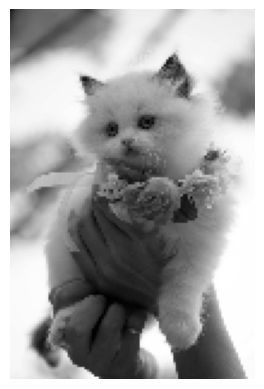

(154, 102)


In [113]:
# load and resize image

img_path = default_path + 'cat_4.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize = None, fx=0.08, fy=0.08)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
print(img.shape)

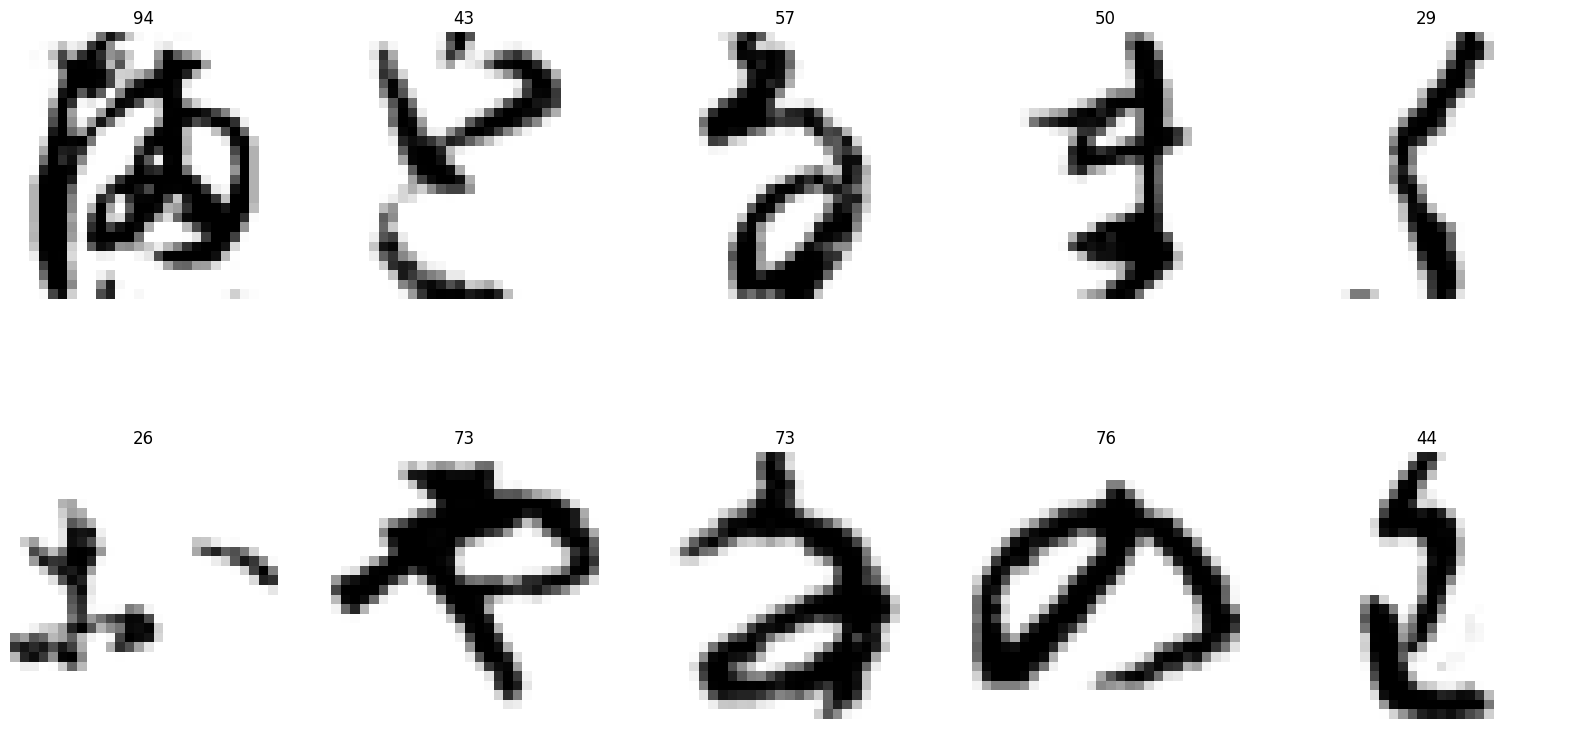

In [114]:
text_imgs = np.load(default_path + 'k49-train-imgs.npz')['arr_0']

plt.figure(figsize = (20,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.title(int(np.mean(text_imgs[i])))
  plt.imshow((255-text_imgs[i]), cmap='gray')
  plt.axis('off')
plt.show()

In [115]:
# sample_imgs = np.load(default_path+'k49-train-imgs.npz')['arr_0']

# plt.figure(figsize=(20, 10))
# for i in range(80):
#     img_patch = 255 - sample_imgs[i] # img 255(흰색)에서 대입하는 느낌??

#     plt.subplot(5, 16, i+1)
#     plt.title(int(np.mean(img_patch)))
#     plt.axis('off')
#     plt.imshow(img_patch, cmap='gray')

In [116]:
text_imgs[i].shape

(28, 28)

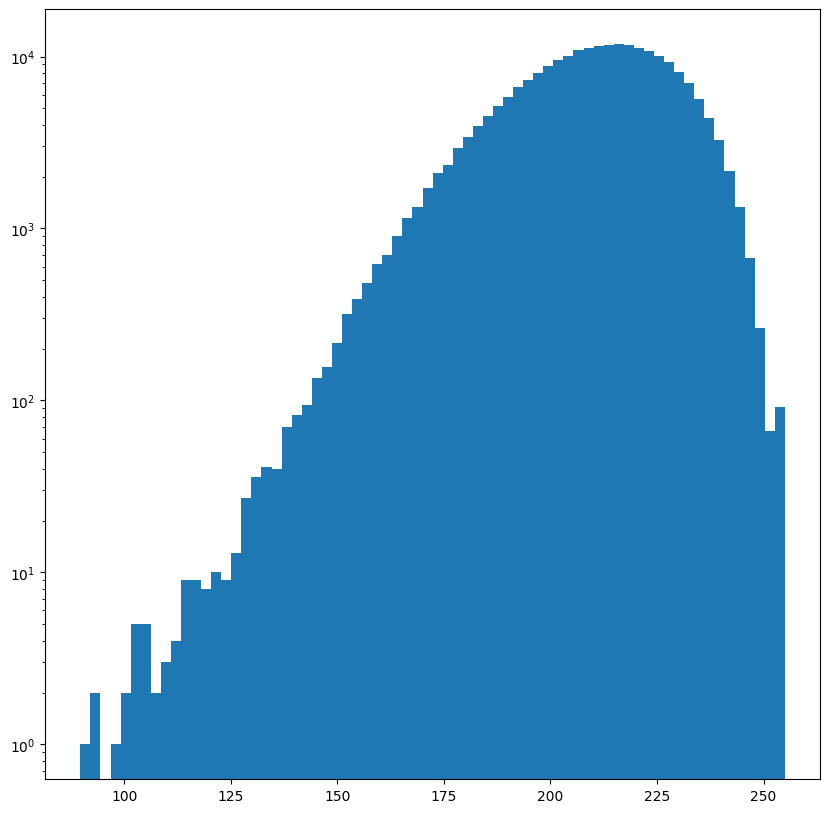

In [117]:
mean = np.mean(255 - text_imgs, axis=(1,2))

plt.figure(figsize = (10,10))
plt.hist(mean, bins = 70, log = True)
plt.show()

In [118]:
print(mean.min(), mean.max())

89.70280612244898 255.0


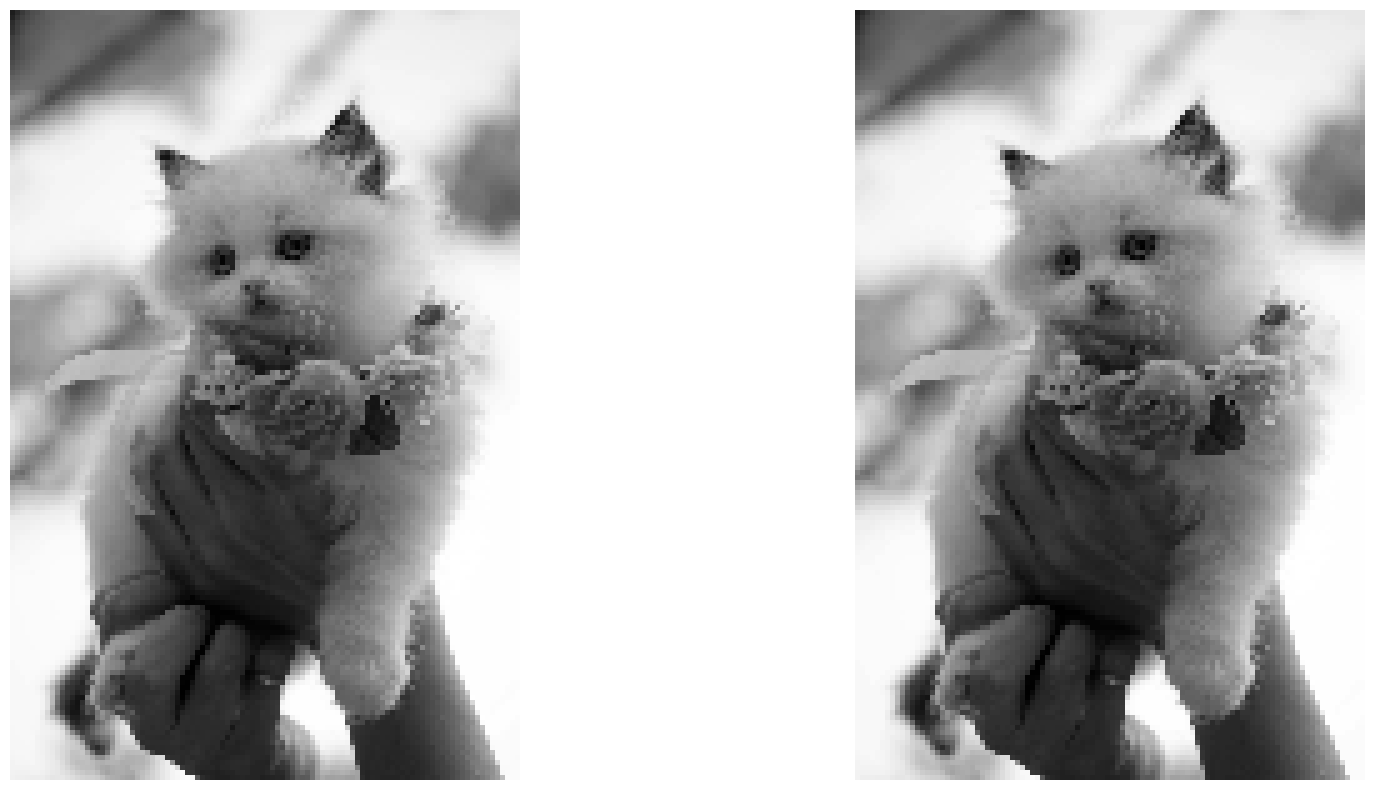

In [119]:
normal_img = cv2.normalize(img, None, 90, 255, norm_type = cv2.NORM_MINMAX)

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(normal_img, cmap='gray')
plt.axis('off')
plt.show()

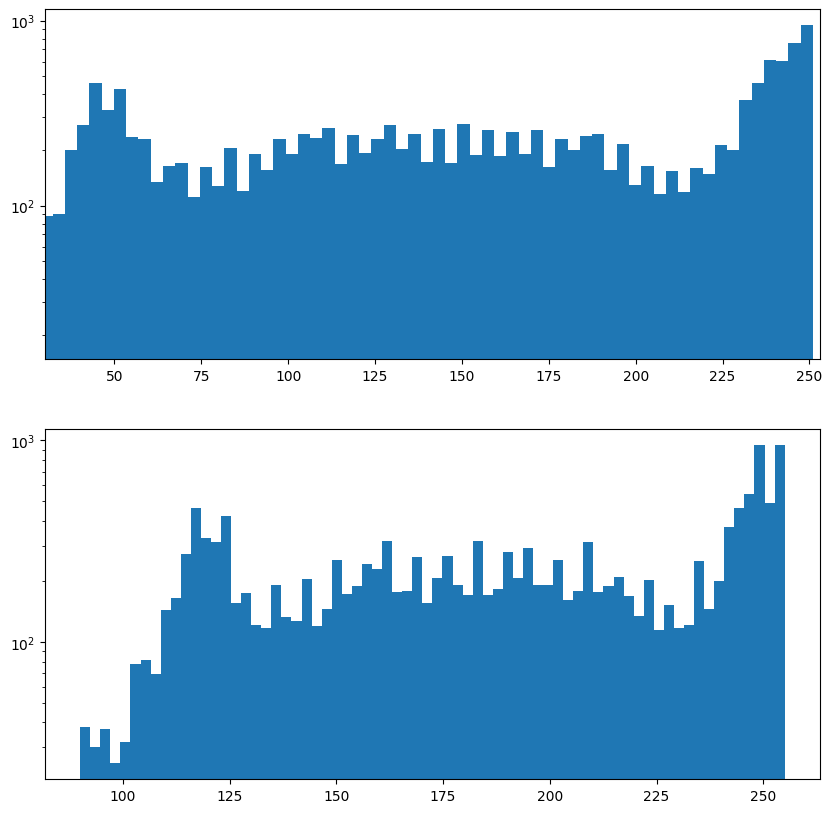

In [120]:
plt.figure(figsize = (10,10))
plt.subplot(2, 1, 1)
plt.hist(img.flatten(), bins = 70, log = True)
plt.xlim(30,253)
plt.subplot(2, 1, 2)
plt.hist(normal_img.flatten(), bins =70, log = True)
plt.show()

In [121]:
normal_img.shape

(154, 102)

In [122]:
len(normal_img.flatten())

15708

In [123]:
normal_img.flatten()[:10]

array([109, 118, 127, 135, 141, 143, 147, 151, 153, 154], dtype=uint8)

In [124]:
img[0][:10]

array([ 32,  46,  60,  71,  80,  84,  89,  96,  98, 100], dtype=uint8)

In [125]:
bins = defaultdict(list)

for img_path, mean in zip(text_imgs, mean):
  bins[int(mean)].append(img_path) # mean에 해당하는 img_path(픽셀 값) 넣기

print(len(bins))

156


In [126]:
len(bins[170])

711

In [127]:
img.shape

(154, 102)

In [128]:
normal_img.shape

(154, 102)

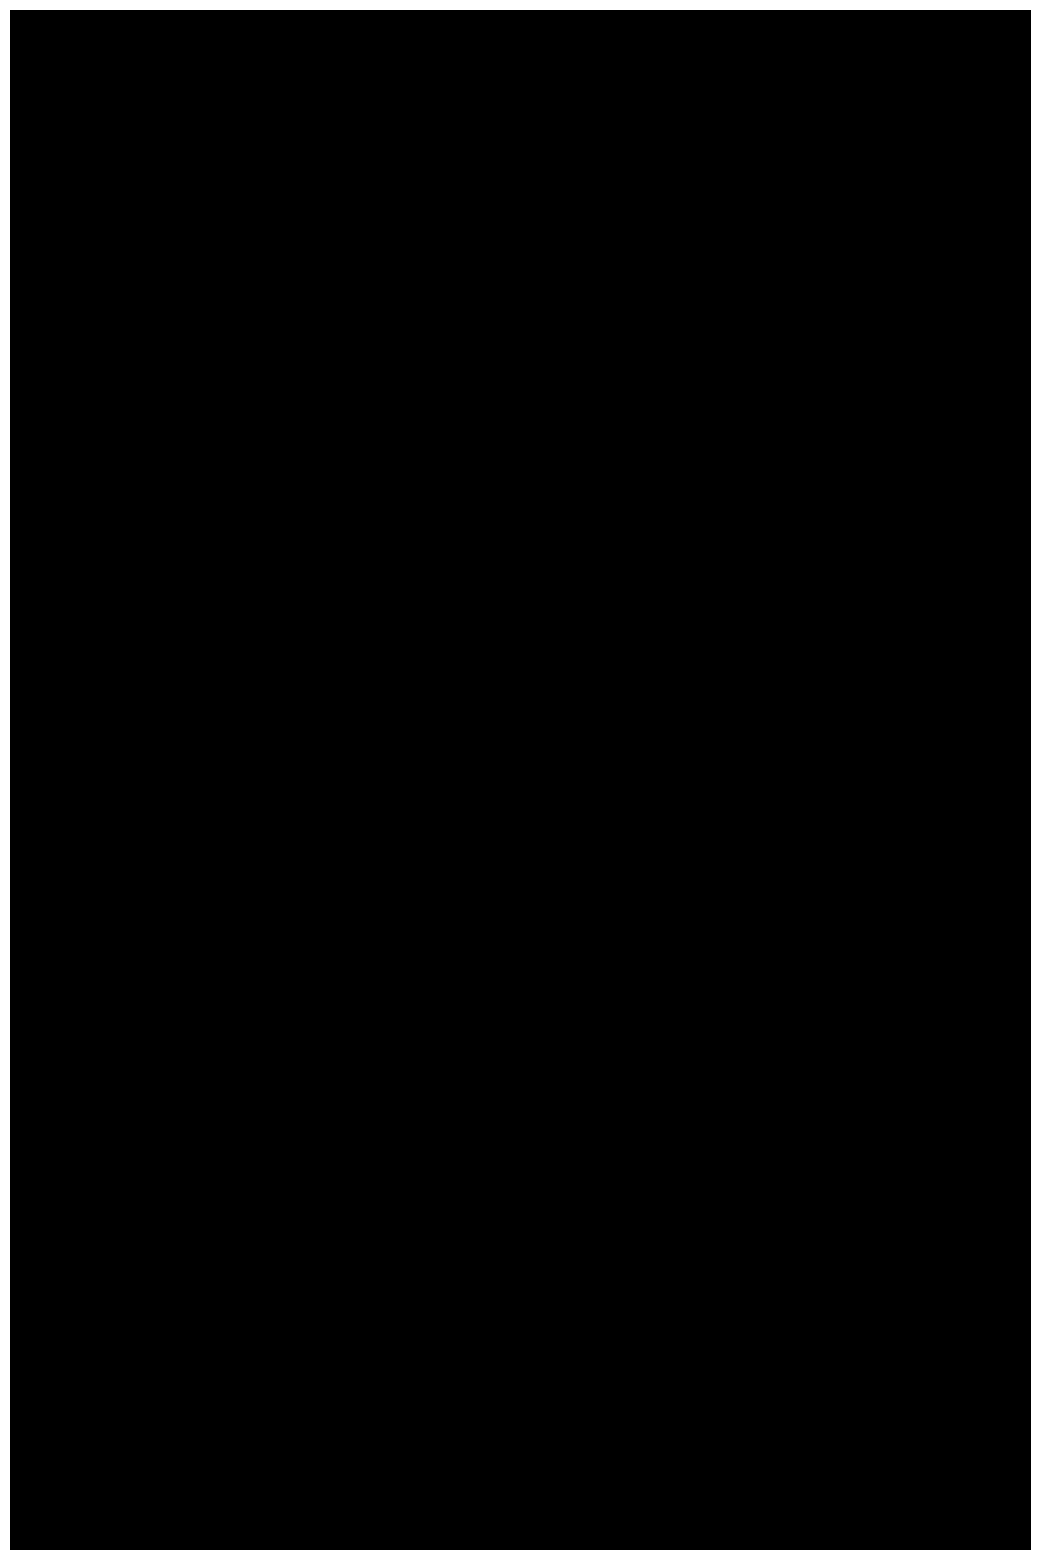

In [129]:
height, width = normal_img.shape

img_output = np.zeros((height*28, width*28), dtype=np.uint8)
# 글자(일본어)의 크기만큼 픽셀의 크기를 늘린다는 느낌
# 바탕(도화지) 출력
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(img_output, cmap='gray')
plt.show()

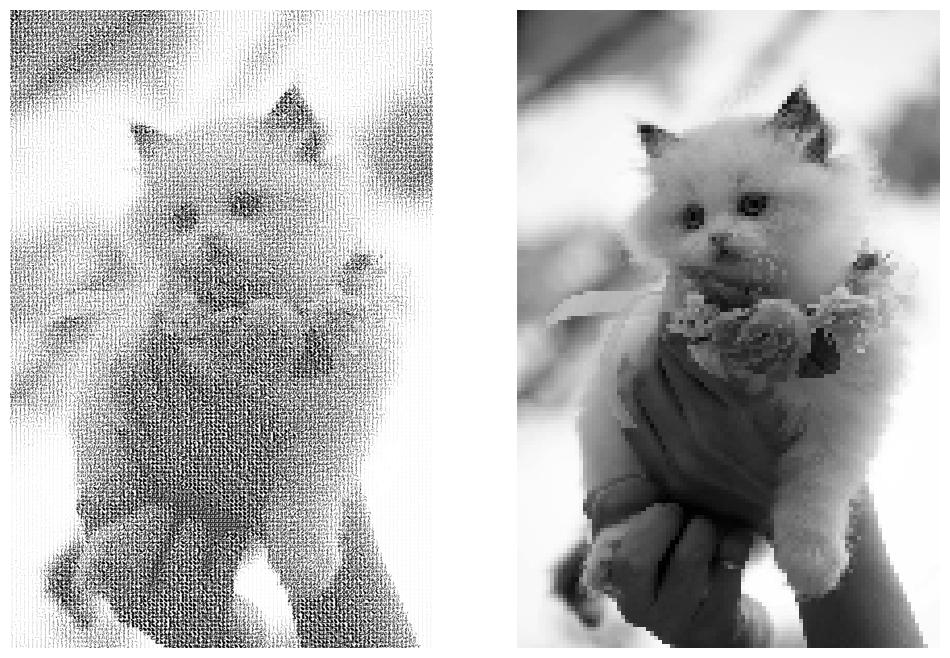

In [130]:
height, width = normal_img.shape

img_output = np.zeros((height*28, width*28), dtype=np.uint8)

for w in range(width):
  for h in range(height):
    normal_level = normal_img[h,w] # 각 픽셀의 정규화 값
    j_word = bins[normal_level] # 노멀라이즈 숫자와 같거나 비슷한 문자 이미지 선택

    while len(j_word) == 0: # 선택한 문자의 bins값이 없다? (찾을 때까지 반복)
      normal_level -= 1
      j_word = bins[normal_level] # 노멀라이즈 숫자와 비슷한 문자 이미지 선택

    img_trans = 255 - j_word[np.random.randint(len(j_word))] # j_word 안에 아무거나 선택

    img_output[h*28:(h+1)*28, w*28:(w+1)*28] = img_trans # 글자(일본어)의 크기만큼 픽셀의 크기를 늘리고 닐린 픽셀 안에 일본어 문자를 넣는다

plt.figure(figsize = (12,12))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img_output, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()